In [1]:
from utils import functions, pathways_functions, complete_tests
from collections import defaultdict
import random
from itertools import product
import os
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
base_path = '../../dataset/synthetic/medium_conserving'
complete_results = []

In [3]:
total_species = 0
correct_species = 0
uncertain_species = 0
graph_directory = '../../dataset/synthetic/medium_conserving'
tested_graphs = 0
true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0
uncertain = []  # The species whose results are between bounds: store the absolute delta and the compound one
statistics_deltas = []  # Store both deltas for every specie in order to have a statistic about magnitudes
# Stores the accuracy for each PW (each experiment individually) the key is the graph number
pathways_results = defaultdict(lambda: [])

for graph in list(os.listdir(graph_directory)):

    # Stores the total number of species classified for this PW (all experiments)
    total_count_pw = 0
    correct_count_pw = 0

    # Results for each experiment: the key is the experiment number 
    # Results include: accuracy and two arrays: correct and incorrect species
    pathway_results = defaultdict(lambda: {})

    print("TESTED GRAPHS ", tested_graphs)
    tested_graphs += 1
    can_complete = False

    if graph == '.DS_Store': continue
    for experiment in list(os.listdir(os.path.join(graph_directory, graph))):

        if experiment == '.DS_Store': continue
        print('GRAPH: ', graph, ' EXPERIMENT: ', experiment, ' DIRECTORY: ', str(experiment))

        res = complete_tests.complete_tests2(
            os.path.join(graph_directory, graph, experiment, 'normal.xml'),
            os.path.join(graph_directory, graph, experiment, 'altered.xml'),
            os.path.join(graph_directory, graph, experiment, 'description'),
            []
        )

        complete_results.append(res)

        insights, all, uncertain, d_normal, d_uncertain = complete_tests.get_insights_confidence_intervals('altered',
                                                                                                           res, 0,
                                                                                                           detailed_classification=True,
                                                                                                           threshold=0,
                                                                                                           ignore_uncertain=False)

        total_species += all  # Whole-class level
        uncertain_species += uncertain

        # Experimet-level
        total_count = 0
        correct_count = 0
        correct_species_list = []
        wrong_species_list = []

        for specie in insights.keys():

            if insights[specie][0] == 0 or insights[specie][1][1] == 0.5:
                continue

            total_count += 1
            if insights[specie][0] == insights[specie][1][0]:
                correct_count += 1
                correct_species += 1  # Whole-class level
                #correct_species_list.append(specie)
            #else:
            #wrong_species_list.append(specie)

            if insights[specie][1][0] == insights[specie][0] == 1:
                correct_species_list.append([specie, {'predicted': 1, 'actual': 1}])
                true_positives += 1
            elif insights[specie][1][0] == insights[specie][0] == -1:
                correct_species_list.append([specie, {'predicted': -1, 'actual': -1}])
                true_negatives += 1
            elif insights[specie][1][0] == 1 and insights[specie][0] == -1:
                wrong_species_list.append([specie, {'predicted': 1, 'actual': -1}])
                false_positives += 1
            elif insights[specie][1][0] == -1 and insights[specie][0] == 1:
                wrong_species_list.append([specie, {'predicted': -1, 'actual': 1}])
                false_negatives += 1

        desc_file = open(os.path.join(graph_directory, graph, experiment, 'description'), 'rb')
        desc = pickle.load(desc_file)
        desc_file.close()

        print('ALTERED REACTION: ', desc['altered'])
        print('CORRECT, TOTAL, RATIO: ', correct_count, total_count, correct_count / total_count)

        pathway_results[experiment]['ratio'] = correct_count / total_count
        pathway_results[experiment]['correct_species'] = correct_species_list
        pathway_results[experiment]['wrong_species'] = wrong_species_list
        pathway_results[experiment]['altered'] = desc['altered']
        #pathway_scores.append(correct_count / total_count)
    #pathways_scores.append(pathway_scores)
    pathways_results[graph] = pathway_results


TESTED GRAPHS  0
TESTED GRAPHS  1
GRAPH:  18  EXPERIMENT:  2627  DIRECTORY:  2627
ALTERED REACTION:  kf3
CORRECT, TOTAL, RATIO:  13 15 0.8666666666666667
GRAPH:  18  EXPERIMENT:  2629  DIRECTORY:  2629
ALTERED REACTION:  kf5
CORRECT, TOTAL, RATIO:  12 15 0.8
GRAPH:  18  EXPERIMENT:  2645  DIRECTORY:  2645
ALTERED REACTION:  kf3
CORRECT, TOTAL, RATIO:  12 15 0.8
GRAPH:  18  EXPERIMENT:  2642  DIRECTORY:  2642
ALTERED REACTION:  kr9
CORRECT, TOTAL, RATIO:  14 15 0.9333333333333333
GRAPH:  18  EXPERIMENT:  2689  DIRECTORY:  2689
ALTERED REACTION:  kf2
CORRECT, TOTAL, RATIO:  11 15 0.7333333333333333
GRAPH:  18  EXPERIMENT:  2674  DIRECTORY:  2674
ALTERED REACTION:  kf5
CORRECT, TOTAL, RATIO:  14 15 0.9333333333333333
GRAPH:  18  EXPERIMENT:  2680  DIRECTORY:  2680
ALTERED REACTION:  kr2
CORRECT, TOTAL, RATIO:  9 15 0.6
GRAPH:  18  EXPERIMENT:  2687  DIRECTORY:  2687
ALTERED REACTION:  kr9
CORRECT, TOTAL, RATIO:  9 15 0.6
GRAPH:  18  EXPERIMENT:  2673  DIRECTORY:  2673
ALTERED REACTION:  k

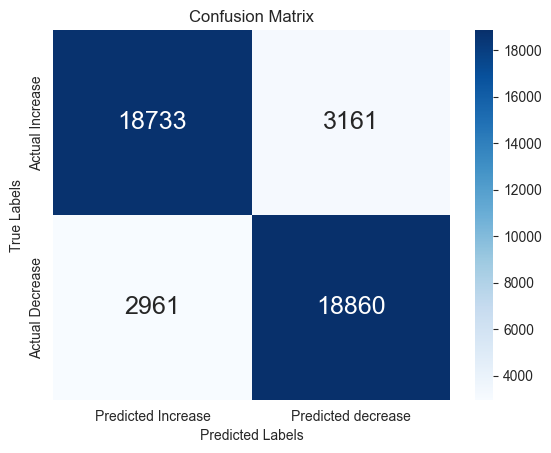

In [4]:
confusion_matrix = [[true_positives, false_positives], [false_negatives, true_negatives]]
# Convert to DataFrame for seaborn
confusion_df = pd.DataFrame(confusion_matrix, index=['Actual Increase', 'Actual Decrease'], columns=['Predicted Increase', 'Predicted decrease'])

# Plot confusion matrix heatmap
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", annot_kws={'size': 18})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [5]:
print('total species: ', total_species, 'correct soecues: ', correct_species, 'uncertain: ', uncertain_species)

total species:  43725 correct soecues:  37593 uncertain:  285


In [6]:
graph = '16'
ratios = {}

for graph, r in pathways_results.items():
    
    list_ratios = []
    for exp in pathways_results[graph].values():
        list_ratios.append(exp['ratio'])
        
    ratios[graph] = list_ratios
    
ratios

{'18': [0.8666666666666667,
  0.8,
  0.8,
  0.9333333333333333,
  0.7333333333333333,
  0.9333333333333333,
  0.6,
  0.6,
  0.6666666666666666,
  0.5333333333333333,
  0.7333333333333333,
  0.6,
  0.5333333333333333,
  0.8666666666666667,
  0.8666666666666667,
  0.8666666666666667,
  0.8666666666666667,
  0.6666666666666666,
  0.6666666666666666,
  0.3333333333333333,
  0.6666666666666666,
  0.8,
  0.9333333333333333,
  0.6666666666666666,
  0.7333333333333333,
  0.8,
  0.8666666666666667,
  0.8666666666666667,
  0.8666666666666667,
  0.9333333333333333,
  0.7333333333333333,
  0.7333333333333333,
  1.0,
  0.6,
  0.6666666666666666,
  1.0,
  0.6666666666666666,
  0.8,
  0.6,
  0.7333333333333333,
  0.8,
  0.7333333333333333,
  0.8,
  0.8,
  0.6666666666666666,
  0.8,
  0.9333333333333333,
  0.8666666666666667,
  0.4666666666666667,
  0.9333333333333333,
  0.8666666666666667,
  0.8666666666666667,
  0.8,
  0.8,
  0.8666666666666667,
  0.6666666666666666,
  0.6666666666666666,
  0.933333

/var/folders/rf/48x9qng97nl7d1b1_vbww4t80000gn/T/ipykernel_79147/2639246311.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, vert=True)


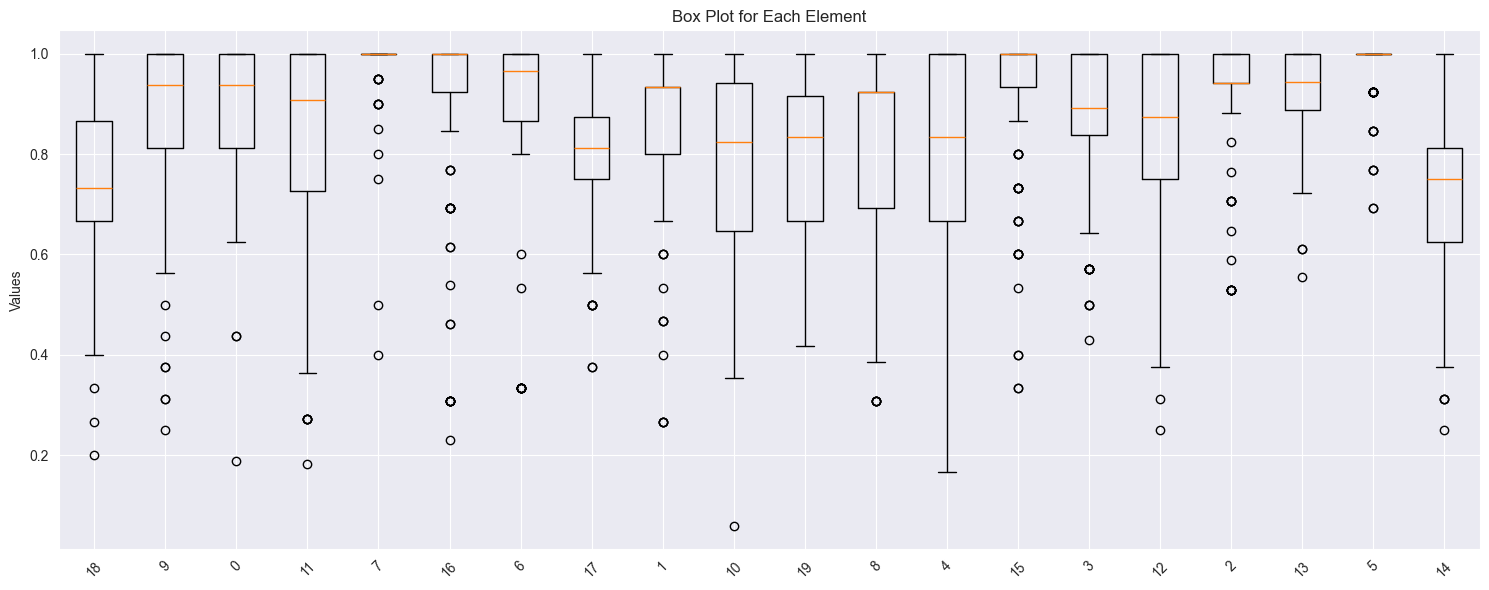

In [7]:
def plot_boxplots(data_dict):
    """
    Generate box plots for each key in the dictionary.

    Parameters:
    - data_dict (dict): A dictionary with keys as labels and values as lists or arrays of numbers.
    """
    labels = list(data_dict.keys())
    data = [data_dict[label] for label in labels]

    plt.figure(figsize=(15, 6))  # Adjust size depending on how readable you want it
    plt.boxplot(data, labels=labels, vert=True)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.title("Box Plot for Each Element")
    plt.ylabel("Values")
    plt.tight_layout()
    plt.show()

plot_boxplots(ratios)

In [2]:
def plot_boxplots(data_dict):
    """
    Generate box plots for each key in the dictionary.

    Parameters:
    - data_dict (dict): A dictionary with keys as labels and values as lists or arrays of numbers.
    """
    labels = list(data_dict.keys())
    data = [data_dict[label] for label in labels]

    plt.figure(figsize=(15, 6))  # Adjust size depending on how readable you want it
    plt.boxplot(data, labels=labels, vert=True)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.title("Box Plot accuracy per pathway medium class conserving")
    plt.ylabel("Ratio")
    plt.xlabel("Pathway #")
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()

In [8]:
for pw in pathways_results.keys():
    pw_path = os.path.join(base_path, pw)
    for exp in pathways_results[pw].keys():
        res_path = os.path.join(pw_path, exp, 'results')
        res_file = open(res_path, 'wb')
        pickle.dump(pathways_results[pw][exp], res_file)
        res_file.close()

## Retrieve results

In [4]:
res_pathways = defaultdict(lambda : [])
for pw in os.listdir(base_path):
    if pw == '.DS_Store' or pw == 'debug': continue
    res = defaultdict(lambda : {})
    pw_path = os.path.join(base_path, pw)
    for exp in os.listdir(pw_path):
        if exp == '.DS_Store': continue
        res_path = os.path.join(pw_path, exp, 'results')
        res_file = open(res_path, 'rb')
        r = pickle.load(res_file)
        res_file.close()
        res[exp] = r
    res_pathways[pw] = res

/var/folders/rf/48x9qng97nl7d1b1_vbww4t80000gn/T/ipykernel_47263/715762779.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, vert=True)


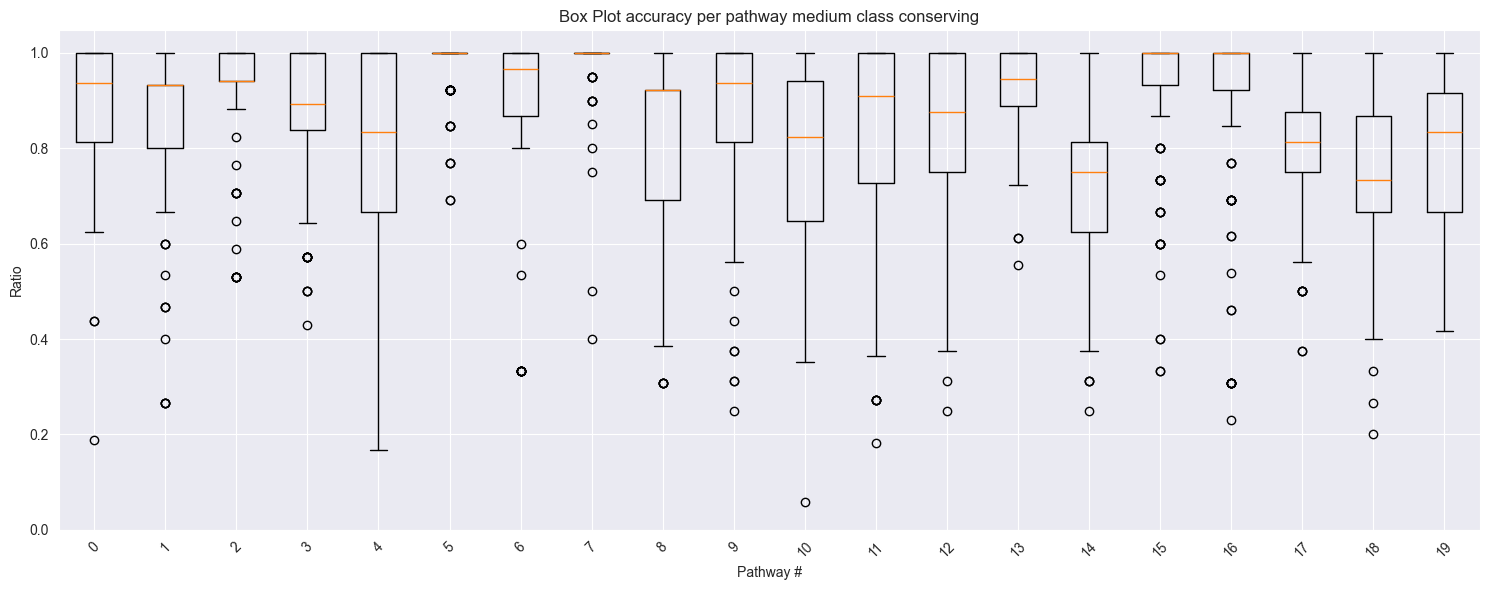

In [5]:
ratios = {}

for graph, r in res_pathways.items():
    
    list_ratios = []
    for exp in res_pathways[graph].values():
        list_ratios.append(exp['ratio'])
        
    ratios[graph] = list_ratios
    
sorted_ratios = dict(sorted(ratios.items(), key=lambda item: int(item[0])))
plot_boxplots(sorted_ratios)